## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [7]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________




In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/500





50000/50000 [==============================] - 16s 315us/step - loss: 2.0476 - acc: 0.2594 - val_loss: 1.9710 - val_acc: 0.2848
Epoch 2/500
50000/50000 [==============================] - 2s 43us/step - loss: 1.8704 - acc: 0.3376 - val_loss: 1.8402 - val_acc: 0.3419
Epoch 3/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.8039 - acc: 0.3632 - val_loss: 2.0086 - val_acc: 0.2632
Epoch 4/500
50000/50000 [==============================] - 2s 43us/step - loss: 1.7661 - acc: 0.3780 - val_loss: 1.8935 - val_acc: 0.3151
Epoch 5/500
50000/50000 [==============================] - 2s 43us/step - loss: 1.7272 - acc: 0.3915 - val_loss: 1.7232 - val_acc: 0.3926
Epoch 6/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.7004 - acc: 0.4008 - val_loss: 1.7362 - val_acc: 0.3909
Epoch 7/500
50000/

50000/50000 [==============================] - 2s 42us/step - loss: 1.2619 - acc: 0.5559 - val_loss: 1.4399 - val_acc: 0.4816
Epoch 46/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.2611 - acc: 0.5570 - val_loss: 1.4942 - val_acc: 0.4675
Epoch 47/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.2475 - acc: 0.5595 - val_loss: 1.5717 - val_acc: 0.4608
Epoch 48/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.2430 - acc: 0.5653 - val_loss: 1.4200 - val_acc: 0.4926
Epoch 49/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.2355 - acc: 0.5666 - val_loss: 1.6061 - val_acc: 0.4283
Epoch 50/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.2307 - acc: 0.5678 - val_loss: 1.5344 - val_acc: 0.4658
Epoch 51/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.2253 - acc: 0.5716 - val_loss: 1.4535 - val_acc: 0.4817
Epoch 52/500
50000/50000 [==============

50000/50000 [==============================] - 2s 42us/step - loss: 0.9284 - acc: 0.6763 - val_loss: 1.4137 - val_acc: 0.5173
Epoch 105/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.9298 - acc: 0.6745 - val_loss: 1.4551 - val_acc: 0.5081
Epoch 106/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.9199 - acc: 0.6818 - val_loss: 1.4433 - val_acc: 0.5128
Epoch 107/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.9154 - acc: 0.6821 - val_loss: 1.4016 - val_acc: 0.5240
Epoch 108/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.9066 - acc: 0.6867 - val_loss: 1.4997 - val_acc: 0.5007
Epoch 109/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.9041 - acc: 0.6839 - val_loss: 1.4921 - val_acc: 0.4909
Epoch 110/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9003 - acc: 0.6855 - val_loss: 1.4076 - val_acc: 0.5192
Epoch 111/500
50000/50000 [=======

50000/50000 [==============================] - 2s 42us/step - loss: 0.6575 - acc: 0.7741 - val_loss: 1.5950 - val_acc: 0.5113
Epoch 163/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.6406 - acc: 0.7792 - val_loss: 1.7319 - val_acc: 0.4962
Epoch 164/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.6309 - acc: 0.7860 - val_loss: 1.4861 - val_acc: 0.5344
Epoch 165/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.6208 - acc: 0.7887 - val_loss: 1.7649 - val_acc: 0.4828
Epoch 166/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.6166 - acc: 0.7917 - val_loss: 1.6197 - val_acc: 0.5176
Epoch 167/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6225 - acc: 0.7882 - val_loss: 1.5955 - val_acc: 0.5150
Epoch 168/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.6146 - acc: 0.7878 - val_loss: 1.5658 - val_acc: 0.5229
Epoch 169/500
50000/50000 [=======

50000/50000 [==============================] - 2s 42us/step - loss: 0.3772 - acc: 0.8790 - val_loss: 2.3565 - val_acc: 0.4348
Epoch 221/500
50000/50000 [==============================] - 2s 43us/step - loss: 0.3818 - acc: 0.8765 - val_loss: 1.9381 - val_acc: 0.5092
Epoch 222/500
50000/50000 [==============================] - 2s 43us/step - loss: 0.3623 - acc: 0.8841 - val_loss: 1.7890 - val_acc: 0.5256
Epoch 223/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.3776 - acc: 0.8781 - val_loss: 1.7449 - val_acc: 0.5406
Epoch 224/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.3417 - acc: 0.8915 - val_loss: 2.3982 - val_acc: 0.4471
Epoch 225/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.4114 - acc: 0.8702 - val_loss: 2.1763 - val_acc: 0.4725
Epoch 226/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.3533 - acc: 0.8881 - val_loss: 1.7860 - val_acc: 0.5310
Epoch 227/500
50000/50000 [=======

50000/50000 [==============================] - 2s 42us/step - loss: 0.2825 - acc: 0.9188 - val_loss: 2.9648 - val_acc: 0.4486
Epoch 279/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.2530 - acc: 0.9306 - val_loss: 2.1367 - val_acc: 0.5244
Epoch 280/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1701 - acc: 0.9556 - val_loss: 2.3930 - val_acc: 0.5166
Epoch 281/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1702 - acc: 0.9535 - val_loss: 2.1551 - val_acc: 0.5311
Epoch 282/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.2222 - acc: 0.9386 - val_loss: 2.3532 - val_acc: 0.5238
Epoch 283/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.2024 - acc: 0.9463 - val_loss: 2.4132 - val_acc: 0.5018
Epoch 284/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.1596 - acc: 0.9599 - val_loss: 2.1739 - val_acc: 0.5310
Epoch 285/500
50000/50000 [=======

50000/50000 [==============================] - 2s 42us/step - loss: 0.0537 - acc: 0.9930 - val_loss: 2.4346 - val_acc: 0.5357
Epoch 337/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0501 - acc: 0.9939 - val_loss: 2.5041 - val_acc: 0.5329
Epoch 338/500
50000/50000 [==============================] - 2s 43us/step - loss: 0.0487 - acc: 0.9942 - val_loss: 2.5418 - val_acc: 0.5265
Epoch 339/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.0472 - acc: 0.9944 - val_loss: 2.4902 - val_acc: 0.5344
Epoch 340/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.0447 - acc: 0.9948 - val_loss: 2.5396 - val_acc: 0.5324
Epoch 341/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.0449 - acc: 0.9943 - val_loss: 2.5165 - val_acc: 0.5323
Epoch 342/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.0442 - acc: 0.9949 - val_loss: 2.4944 - val_acc: 0.5381
Epoch 343/500
50000/50000 [=======

50000/50000 [==============================] - 2s 42us/step - loss: 0.0213 - acc: 0.9991 - val_loss: 2.7543 - val_acc: 0.5324
Epoch 395/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0212 - acc: 0.9989 - val_loss: 2.7273 - val_acc: 0.5345
Epoch 396/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0201 - acc: 0.9991 - val_loss: 2.7343 - val_acc: 0.5349
Epoch 397/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0197 - acc: 0.9992 - val_loss: 2.7388 - val_acc: 0.5385
Epoch 398/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0194 - acc: 0.9994 - val_loss: 2.7466 - val_acc: 0.5359
Epoch 399/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0188 - acc: 0.9993 - val_loss: 2.7822 - val_acc: 0.5319
Epoch 400/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.0183 - acc: 0.9993 - val_loss: 2.7672 - val_acc: 0.5346
Epoch 401/500
50000/50000 [=======

50000/50000 [==============================] - 2s 42us/step - loss: 0.0088 - acc: 0.9999 - val_loss: 3.0069 - val_acc: 0.5355
Epoch 453/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0086 - acc: 0.9999 - val_loss: 3.0142 - val_acc: 0.5349
Epoch 454/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0085 - acc: 0.9999 - val_loss: 3.0181 - val_acc: 0.5331
Epoch 455/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0084 - acc: 1.0000 - val_loss: 3.0250 - val_acc: 0.5336
Epoch 456/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 3.0179 - val_acc: 0.5354
Epoch 457/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 3.0294 - val_acc: 0.5360
Epoch 458/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0081 - acc: 1.0000 - val_loss: 3.0304 - val_acc: 0.5356
Epoch 459/500
50000/50000 [=======

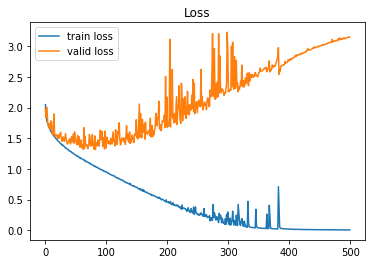

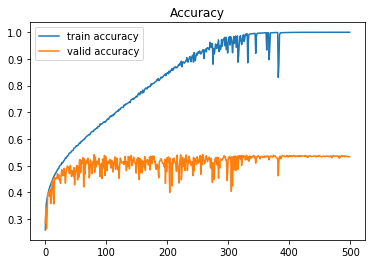

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()